# ROC Curves and AUC - Lab


## Introduction 

In this lab, we'll practice drawing ROC graphs, calculating AUC, and interpreting these results. In doing so, we will also further review logistic regression, by briefly fitting a model as in a standard data science pipeline.

## Objectives

You will be able to:

* Evaluate classification models using various metrics
* Define and understand ROC and AUC

## Training the Model

Start by repeating the previous modelling steps we have discussed. For this problem, you are given a dataset **mushrooms.csv**. You're first job is to train a LogisticRegression classifier on the dataset to determine whether the mushroom is **e**dible or **p**oisonous. The first column of the dataset *class* indicates whether or not the mushroom is poisonous or edible.

** For consistency use random_state=0**

In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [29]:
mush = pd.read_csv('mushrooms.csv')
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [33]:
#create X features
X=mush.drop(['class'], axis=1)
#create dummy variables 
X=pd.get_dummies(X)
y = pd.get_dummies(mush['class']).iloc[:,1]

In [31]:
#split into train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [34]:
#create the log reg class instance and fit, train it 
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg.fit(X_train,y_train)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [37]:
#predict 
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

## ROC Metrics
  
Next, calculate the false positive rate and true positive rate (you can use the built in metrics from SciKit-Learn) of your classifier.

In [58]:
from sklearn.metrics import roc_curve, auc

y_score = logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = logreg.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

## Drawing the ROC Graph

Next, use the false positive rate and true positive rate to plot the Receiver Operating Characteristic Curve for both the train and test sets.

AUC: 1.0


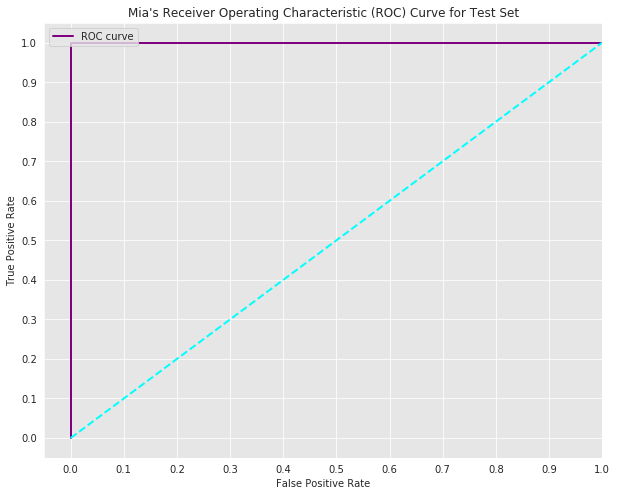

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#set seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#set figure size
plt.figure(figsize=(10,8))
lw = 2 #linewidth
plt.plot(fpr, tpr, color='purple',
         lw=lw, label='ROC curve') #plot the fpr and tpr 
plt.plot([0, 1], [0, 1], color='cyan', lw=lw, linestyle='--') #plot the 50% rating 
plt.xlim([-0.05, 1.0]) #set plot domain
plt.ylim([-0.05, 1.05])#set plot range 
plt.yticks([i/10.0 for i in range(11)]) 
plt.xticks([i/10.0 for i in range(11)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Mia's Receiver Operating Characteristic (ROC) Curve for Test Set")
plt.legend(loc="upper left")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

## Interpretation:

What do you notice about these ROC curves?

## Your answer here

It's too good to be true!

## Interpretation
Look at the ROC curve graph from the lesson:  

<img src="images/lesson_roc_graph.png">

Think about the scenario of this model: predicting heart disease. If you tune the current model to have and 82% True Positive Rate, (you've still missed 20% of those with heart disease), what is the False positive rate?

$$fpr =.17$$

## Interpretation 2
If you instead tune the model to have a 95.2% True Postive Rate, what will the False Postive Rate be?

$fpr = .25$ to $.35$

## Opinion
In the case of heart disease that we've been talking about, do you find any of the above cases acceptable? How would you tune the model. Describe what this would mean in terms of the number of patients falsely scared of having heart disease and the risk of missing the warning signs for those who do actually have heart disease.

False positive: We tell them they have heart disease and they don't. 
False negative: We tell them they don't have heart disease, and they do. 
I would much rather err on the side of not missing any potential victims of a heart attack than whether or not I'm worrying someone with a false positive. Worst case scenario for a false positive: Someone is stressed out. Worst case scenario for false negative: Someone dies.  

This means I would be more concerned with my recall than precision, and my accuracy would need to be high as well. 


## Summary

In this lesson we further explored ROC curves and AUC, drawing graphs and then interpreting these results to lead to a more detailed and contextualized understanding of our model's accuracy.